In [10]:
using Graphs, MetaGraphsNext

includet("../../utils/import_utils.jl")
includet("../../utils/visu.jl")
includet("io.jl")
includet("generate-caps.jl")

#includet("io.jl")

In [2]:
function read_sndlib_graph(filename::String)
    # Initialiser un graphe vide
    g = Graph()

    # Dictionnaires pour stocker les nœuds et les liens
    nodes = Dict{String, Int}()
    edges = Vector{Tuple{Int, Int}}()

    # Variables pour stocker les sections actuelles
    in_nodes_section = false
    in_links_section = false
    
    current_nb = 1
    lines = 0
    open(filename, "r") do file
        lines = readlines(file)
    end

    # Lire le contenu du fichier ligne par ligne
    for line in lines
        line = strip(line)

        println("line: $line")
        if occursin("NODES", line)
            println("Ya")
            in_nodes_section = true
            in_links_section = false
            continue
        elseif occursin("LINKS", line)
            in_nodes_section = false
            in_links_section = true
            continue
        elseif occursin(")", line) && !occursin("(", line) 
            in_nodes_section = false
            in_links_section = false
            continue
        end

        if in_nodes_section
            # Lire les nœuds
            parts = split(line)
            println("Hello there ! m : $parts")
            if parts !== nothing
                node_id = parts[1]
                #longitude = parse(Float64, parts[2])
                #latitude = parse(Float64, parts[3])
                add_vertex!(g)
                nodes[node_id] = current_nb 
                current_nb += 1
                println("Node $node_id with nb $(nodes[node_id])")
            end
        elseif in_links_section
            # Lire les liens
            m = match(r"^L\d+\s+\(\s*(\w+)\s+(\w+)\s*\)", line)
            if m !== nothing
                source = m[1]
                target = m[2]
                if haskey(nodes, source) && haskey(nodes, target)
                    push!(edges, (nodes[source], nodes[target]))
                end
            end
        end
    end

    # Ajouter les arêtes au graphe
    for (src, dst) in edges
        add_edge!(g, src, dst)
    end

    return g
end

read_sndlib_graph (generic function with 1 method)

line: ?SNDlib native format; type: network; version: 1.0
line: # network janos-us
line: 
line: # NODE SECTION
line: #
line: # <node_id> [(<longitude>, <latitude>)]
line: 
line: NODES (
Ya
line: Seattle ( -122.30 47.45 )


Hello there ! m : SubString{String}["Seattle", "(", "-122.30", "47.45", ")"]
Node Seattle with nb 1
line: LosAngeles ( -118.40 33.93 )
Hello there ! m : SubString{String}["LosAngeles", "(", "-118.40", "33.93", ")"]
Node LosAngeles with nb 2
line: SanFrancisco ( -122.38 37.62 )
Hello there ! m : SubString{String}["SanFrancisco", "(", "-122.38", "37.62", ")"]
Node SanFrancisco with nb 3
line: LasVegas ( -115.17 36.08 )
Hello there ! m : SubString{String}["LasVegas", "(", "-115.17", "36.08", ")"]
Node LasVegas with nb 4
line: SaltLakeCity ( -111.97 40.78 )
Hello there ! m : SubString{String}["SaltLakeCity", "(", "-111.97", "40.78", ")"]
Node SaltLakeCity with nb 5
line: ElPaso ( -106.40 31.80 )
Hello there ! m : SubString{String}["ElPaso", "(", "-106.40", "31.80", ")"]
Node ElPaso with nb 6
line: Dallas ( -96.85 32.85 )
Hello there ! m : SubString{String}["Dallas", "(", "-96.85", "32.85", ")"]
Node Dallas with nb 7
line: Houston ( -95.35 29.97 )
Hello there ! m : SubString{String}["Housto

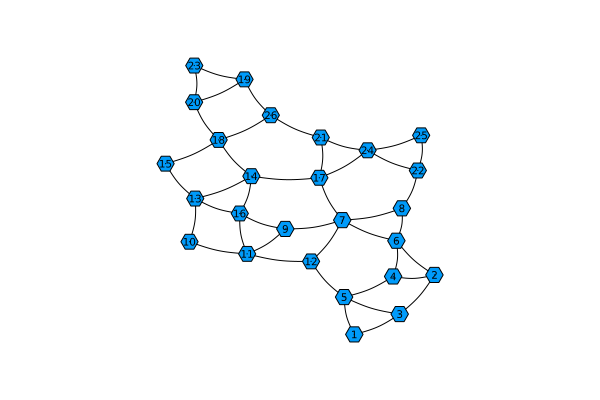

In [3]:
path = "sndlib/janos.graph"

g = read_sndlib_graph(path)

visu_graph(g)

In [4]:
println("Graph with $(nv(g)) nodes and $(ne(g)) arretes")

Graph with 26 nodes and 42 arretes


In [16]:
put_as_virtual(g)

11943

In [12]:
put_as_virtual_and_save(g, "janos")

2483